In [1]:
import numpy as np
import scipy as sp
import scipy.linalg as la 
import scipy.sparse.linalg as spla
import time 
import matplotlib.pyplot as plt
import cmath
from utils import helper
%matplotlib inline

### Problem 1. 
Implement Newton’s method with a function that accepts the following parameters: a function `f`, an initial `x`-value, the derivative of the function `f`, the number of iterations of Newton’s method to perform that de￼faults to `15`, and a tolerance that defaults to `10-6`. The function returns when the difference between successive approximations is less than the tolerance or the max number of iterations has been reached.

In [2]:
def newton(f, x0, df, num_iter = 15, tol = 10e-6):
    for i in range(num_iter):
        x1 = x0 - (f(x0)/df(x0))
        if np.abs(x1-x0)<tol:
            return x1
        else:
            x0 = x1
    return x1

In [3]:
f = lambda x: x**2 -1
df = lambda x: 2*x
newton(f, -1.5, df)

-1.000000000013107

### Problem 2.

1. Newton’s method can be used to find zeros of functions that are hard to solve for analytically. Plot $f(x) = \frac{sin(x)}{x} -x$ on $[-4, 4]$. Note that this function can be made continuous on this domain by defining f(0) = 1.

    Use your function Newtons_method() to compute the zero of this function to seven digits of accuracy.

2. Run `Newtons_method()` on $f(x) = x^{1/3}$ with $x_0 = 0.01$. What happens and why? Hint: The command `x**(1/3)` will not work when x is negative. Here is one way to define the function $f(x) = x^{1/3}$ in NumPy.

        f = lambda x: np.sign(x)*np.power(np.abs(x), 1./3)

In [4]:
#1.)
f = lambda x: (np.sin(x)/x) - x
x = np.linspace(-4, 4, 100)
df = lambda x: (np.cos(x)/x) - (np.sin(x)/(x**2)) - 1

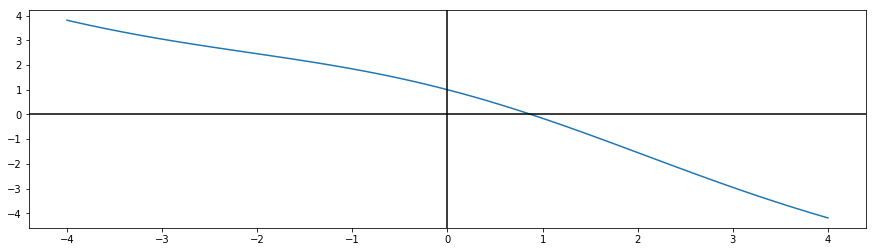

In [5]:
plt.figure(figsize=(15,4))
plt.plot(x, f(x))
plt.axhline(y=0, xmin=-4, xmax=4, color='k')
plt.axvline(x=0, ymin=-4, ymax=4, color='k')

In [6]:
newton(f, 0.5, df, num_iter=100, tol=1e-7)

0.87672621539506235

In [7]:
#check with scipy.optimize.newton
import scipy.optimize as so
so.newton(f, 0.5, maxiter=100, )

0.87672621539506235

In [8]:
#2.)
f = lambda x: np.sign(x)*np.power(np.abs(x), 1./3)
df = lambda x: 1/(3*(x**2)**(1./3))  
x = np.linspace(-0.1, 0.1, 1000)

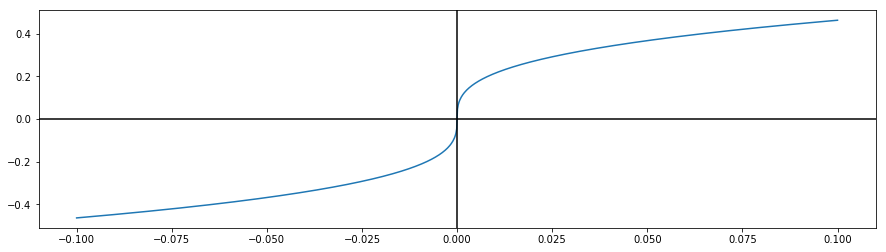

In [9]:
plt.figure(figsize=(15,4))
plt.plot(x, f(x))
plt.axvline(x=0, ymin=-1, ymax=1, color = 'k')
plt.axhline(y=0, xmin=-1, xmax=1, color = 'k')

In [10]:
newton(f, 0.01, df, num_iter=100)

1.2676506002279156e+28

### Problem 3.
Suppose that an amount of $P_1$ dollars is put into an account at the beginning of years `1, 2, ..., N1` and that the account accumulates interest at a fractional rate `r`. (For example, `r = .05` corresponds to `5%` interest.) Suppose also that, at the beginning of years `N1 + 1`, `N1 + 2`, `...`, `N1 + N2`, an amount of $P_2$ dollars is withdrawn from the account and that the account balance is exactly zero after the withdrawal at year `N1 + N2`. Then the variables satisfy the following equation:
$$P_1[(1+r)^{N_1} - 1] = P_2[1-(1+r)^{-N_2}]$$

If $N_1 = 30$,$N_2 = 20$,$P_1 = 2000$, and $P_2 = 8000$, use Newton’s method to determine `r`. (From Atkinson Page 118)

In [11]:
N1 = 30
N2 = 20
P1 = 2000
P2 = 8000
f = lambda r: P1*((1+r)**N1 - 1) - P2*(1-(1+r)**-N2)
df = lambda r: P1*N1*(1+r)**(N1-1) + P2*N2*(1+r)**(-N2-1)

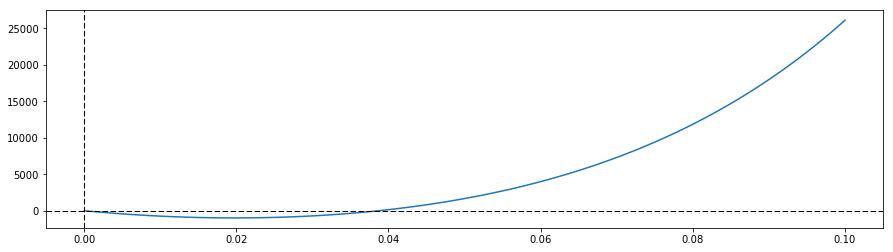

In [12]:
r = np.linspace(0,0.1, 100)
plt.figure(figsize=(15,4))
plt.plot(r, f(r))
plt.axvline(x=0, color='k', lw = 1, ls='--')
plt.axhline(y=0, color='k', lw = 1, ls='--')

In [13]:
newton(f, 1, df, num_iter=1000)

0.038791505566498685

### Problem 4.

1. Modify your `Newtons_method()` function so that it accepts a parameter $\alpha$ that defaults to 1 to allow backtracking.

2. Find an $\alpha < 1$ so that running `Newtons_method()` on $f(x) = x^{1/3}$ with $x_0 = .01$ converges. (See Problem 2). Return the results of `Newtons_method()`.

In [14]:
def newton_modified(f, x0, df, num_iter = 15, tol = 10e-6, alpha=1):
    for i in range(num_iter):
        x1 = x0 - alpha*(f(x0)/df(x0))
        if np.abs(x1-x0)<tol:
            return x1
        else:
            x0 = x1
    return x1

In [15]:
f = lambda x: np.sign(x)*np.power(np.abs(x), 1./3)
df = lambda x: 1/(3*(x**2)**(1./3))  
x = np.linspace(-0.1, 0.1, 1000)

In [16]:
newton_modified(f, 0.01, df, num_iter=100, alpha=0.5)

2.4414062500000377e-06

### Problem 5. 

1. Create a Newtons_vector() function that performs Newton’s method on vectors.

2. Bioremediation involves the use of bacteria to consume toxic wastes. At steady state, the bacterial density $x$ and the nutrient concentration $y$ satisfy the system of nonlinear equations:
$$\gamma xy - x(1+y) = 0,$$
$$-xy + (\delta -y)(1+y) = 0,$$

where $\gamma$ and $\delta$ are parameters that depend on various physical features of the system. For this problem, assume the typical values $\gamma$ = 5 and $\delta$ = 1, for which the system has solutions at $(x,y) = (0,1),(0,-1)$, and $(3.75,.25)$. 

Solve the system using Newton’s method and Newton’s method with backtracking. (Find an initial point where using $\alpha = 1$ converges to either $(0, 1)$ or $(0, -1)$ and using $\alpha < 1$ converges to $(3.75,.25)$). Use `matplotlib` to demonstrate the tracks used to find the solution. (See Figure 10.2) Hint: use starting values within the rectangle

$$(x, y) : -0.25 \leqslant x \leqslant 0.25, -0.25 \leqslant y \leqslant 0.25$$
(Adapted from problem 5.19 of M. T. Heath, Scientific Computing, an Introductory Survey, 2nd edition, McGraw?Hill, 2002 and the Notes of Homer Walker)

In [17]:
def newton_vector(f, x0, df, num_iter=100, tol=10e-10, alpha=1):
    for i in range(num_iter):
        x1 = x0 - alpha*np.dot(la.inv(df(x0)),f(x0))
        if la.norm(x1-x0)<tol:
            return x1
        else:
            x0 = x1
    return x1

In [18]:
gamma = 5
delta = 1

f = lambda x: np.array([gamma*x[0]*x[1] - x[0]*(1+x[1]), -x[0]*x[1] + (delta-x[1])*(1+x[1])])
df = lambda x: np.array([[gamma*x[1] - (1+x[1]), gamma*x[0] - x[0]],
                         [-x[1] ,-x[0] +(delta-x[1])-(1+x[1])]])

In [19]:
x0 = np.array([0.1,0])
newton_vector(f, x0, df, num_iter=1000)

array([ -6.50475770e-25,   1.00000000e+00])

In [20]:
x0 = np.array([-0.2, 0])
newton_vector(f, x0, df, num_iter=1000)

array([ -2.28706554e-26,  -1.00000000e+00])

In [21]:
x0 = np.array([0.25, 0.1])
newton_vector(f, x0, df, alpha=0.01, num_iter=1000)

array([ 3.74984078,  0.24999962])

### Basins of Attractions

In [22]:
xreal = np.linspace(-1.5, 1.5, 700)
ximag = np.linspace(-1.5, 1.5, 700)
Xreal, Ximag = np.meshgrid(xreal, ximag)
Xold = Xreal+1j*Ximag

In [23]:
f = lambda x : x**3-x
Df = lambda x : 3*x**2 - 1
for i in range(100):
    Xnew = Xold - f(Xold)/Df(Xold)
    Xold = Xnew

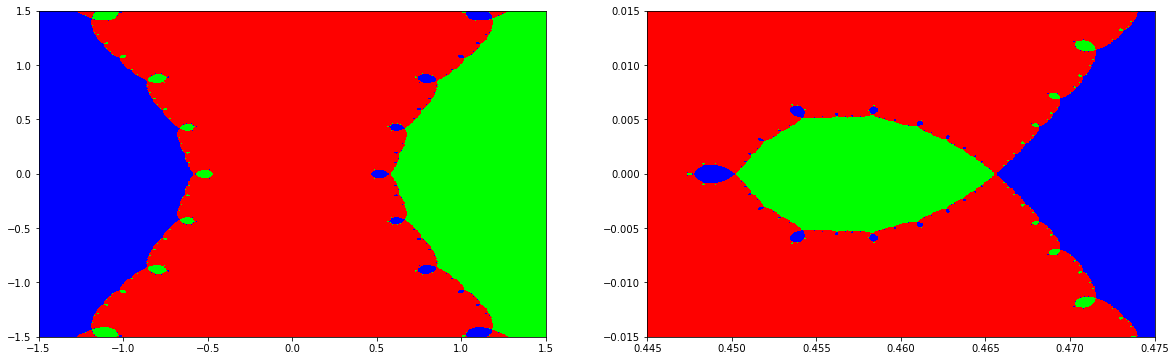

In [24]:
plt.figure(figsize=(20,6))
plt.subplot(121)
plt.pcolormesh(Xreal, Ximag, np.real(Xnew), cmap="brg")


xreal = np.linspace(0.445, 0.475, 700)
ximag = np.linspace(-0.015, 0.015, 700)
xreal, ximag = np.meshgrid(xreal, ximag)
xold = xreal+1j*ximag
for i in range(100):
    xnew = xold - f(xold)/Df(xold)
    xold = xnew
    
plt.subplot(122)
plt.pcolormesh(xreal, ximag, np.real(xnew), cmap="brg")

### Problem 6.

Complete the following function to plot the basins of attraction of a function.

    ￼￼```
    def plot_basins(f, Df, roots, xmin, xmax, ymin, ymax, numpoints=100, iters - =15, colormap='brg'):
        """Plot the basins of attraction of f.
        INPUTS:
        f       - A function handle. Should represent a function
                from C to C.
        Df      - A function handle. Should be the derivative of f.
        roots   - An array of the zeros of f.
        xmin, xmax, ymin, ymax - Scalars that define the domain
                for the plot.
        numpoints - A scalar that determines the resolution of
                    the plot. Defaults to 100.
        iters - Number of times to iterate Newton's method.Defaults to 15.
        colormap - A colormap to use in the plot. Defaults to 'brg'. """
    ```
You can test your function on the example $f(x) = x^3 - x$ above.

When the function `plt.pcolormesh()` is called on a complex array, it evaluates only on the real part of the complex numbers. This means that if two roots of `f` have the same real part, their basins will be the same color if you plot directly using `plt.pcolormesh()`.

One way to fix this problem is to compute `Xnew` as usual. Then iterate through the entries of `Xnew` and identify which root each entry is closest to using the input roots. Finally, create a new array whose entries are integers corresponding to the indices of these roots. Plot the array of integers to view the basins of attraction.

(Hint: The roots of $f(x) = x^3 - x$ are 0, 1, and -1.)

In [25]:
def plot_basins(f, Df, roots, xmin, xmax, ymin, ymax, numpoints=100, iters =15, colormap='brg'):
    """Plot the basins of attraction of f.
    INPUTS:
    f       - A function handle. Should represent a function
            from C to C.
    Df      - A function handle. Should be the derivative of f.
    roots   - An array of the zeros of f.
    xmin, xmax, ymin, ymax - Scalars that define the domain
            for the plot.
    numpoints - A scalar that determines the resolution of
                the plot. Defaults to 100.
    iters - Number of times to iterate Newton's method.Defaults to 15.
    colormap - A colormap to use in the plot. Defaults to 'brg'. """
    
    xreal = np.linspace(xmin, xmax, numpoints)
    ximag = np.linspace(ymin, ymax, numpoints)
    Xreal, Ximag = np.meshgrid(xreal, ximag)
    Xold = Xreal+1j*Ximag 
    for i in range(iters):
        Xnew = Xold - f(Xold)/Df(Xold)
        Xold = Xnew
    
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(Xreal, Ximag, np.real(Xnew), cmap = colormap)

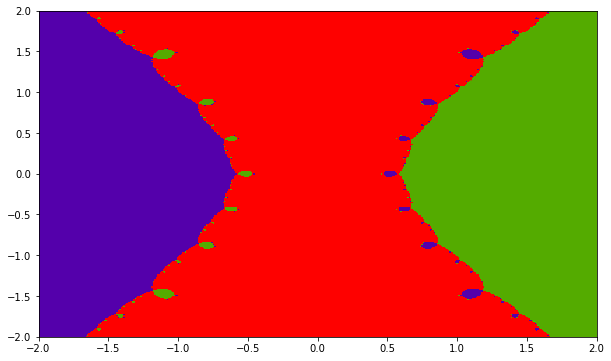

In [26]:
f = lambda x: x**3 -x
df = lambda x: 3*x**2 -1
plot_basins(f, df, [0,1,-1], -2, 2, -2, 2, numpoints=400)